# Research Workflow

This notebook demonstrates the research [workflow](https://langchain-ai.github.io/langgraph/tutorials/workflows/) that creates comprehensive reports through a series of focused steps. The system:

1. Uses a **graph workflow** with specialized nodes for each report creation stage
2. Enables user **feedback and approval** at critical planning points 
3. Produces a well-structured report with introduction, researched body sections, and conclusion

## From repo 

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/chris/Code/AI Makerspace/Misc/open_deep_research/src


## From package 

In [3]:
! uv pip install -U -q open-deep-research

# Compile the Graph-Based Research Workflow

The next step is to compile the LangGraph workflow that orchestrates the report creation process. This defines the sequence of operations and decision points in the research pipeline.

In [4]:
# Import required modules and initialize the builder from open_deep_research
import uuid 
import os, getpass
import open_deep_research   
print(open_deep_research.__version__) 
from IPython.display import Image, display, Markdown
from langgraph.types import Command
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.graph import builder

0.0.15


In [5]:
# Create a memory-based checkpointer and compile the graph
# This enables state persistence and tracking throughout the workflow execution

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

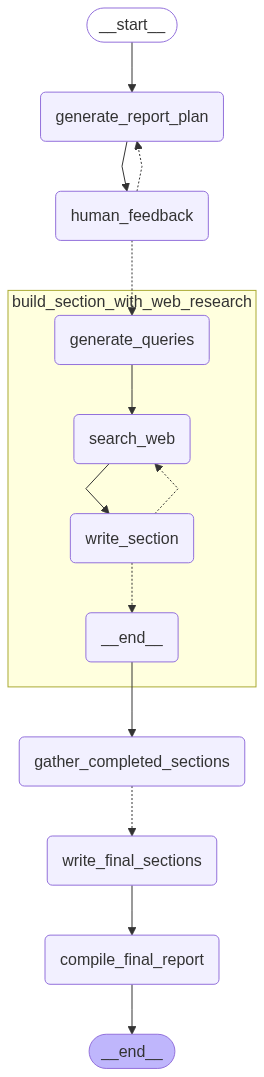

In [6]:
# Visualize the graph structure
# This shows the nodes and edges in the research workflow

display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [7]:
# Helper function to set environment variables for API keys
# This ensures all necessary credentials are available for various services

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# Set the API keys used for any model or search tool selections below, such as:
_set_env("OPENAI_API_KEY")
_set_env("ANTHROPIC_API_KEY")
_set_env("TAVILY_API_KEY")
_set_env("GROQ_API_KEY")
_set_env("PERPLEXITY_API_KEY")

In [8]:
# Define report structure template and configure the research workflow
# This sets parameters for models, search tools, and report organization

REPORT_STRUCTURE = """Use this structure to create a report on the user-provided topic:

1. Introduction (no research needed)
   - Brief overview of the topic area

2. Main Body Sections:
   - Each section should focus on a sub-topic of the user-provided topic
   
3. Conclusion
   - Aim for 1 structural element (either a list of table) that distills the main body sections 
   - Provide a concise summary of the report"""

# Configuration option 1: Claude 3.7 Sonnet for planning with perplexity search
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                           "search_api": "perplexity",
                           "planner_provider": "anthropic",
                           "planner_model": "claude-3-7-sonnet-latest",
                           # "planner_model_kwargs": {"temperature":0.8}, # if set custom parameters
                           "writer_provider": "anthropic",
                           "writer_model": "claude-3-5-sonnet-latest",
                           # "writer_model_kwargs": {"temperature":0.8}, # if set custom parameters
                           "max_search_depth": 2,
                           "report_structure": REPORT_STRUCTURE,
                           }}

# Configuration option 2: DeepSeek-R1-Distill-Llama-70B for planning and llama-3.3-70b-versatile for writing
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                           "search_api": "tavily",
                           "planner_provider": "groq",
                           "planner_model": "deepseek-r1-distill-llama-70b",
                           "writer_provider": "groq",
                           "writer_model": "llama-3.3-70b-versatile",
                           "report_structure": REPORT_STRUCTURE,
                           "max_search_depth": 1,}
                           }

# Configuration option 3: Use OpenAI o3 for both planning and writing (selected option)
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                           "search_api": "tavily",
                           "planner_provider": "openai",
                           "planner_model": "o3",
                           "writer_provider": "openai",
                           "writer_model": "o3",
                           "max_search_depth": 2,
                           "report_structure": REPORT_STRUCTURE,
                           }}

# Define research topic about Model Context Protocol
topic = "Overview of Model Context Protocol (MCP), an Anthropic‑backed open standard for integrating external context and tools with LLMs. Give an architectural overview for developers, tell me about interesting MCP servers, and compare to google Agent2Agent (A2A) protocol."

# Run the graph workflow until first interruption (waiting for user feedback)
async for event in graph.astream({"topic":topic,}, thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

query_list: ['"Model Context Protocol" MCP architecture specification Anthropic external context integration servers examples', '"Agent2Agent" A2A protocol Google large language model multi-agent communication specification comparison MCP'] params_to_pass: {}


Please provide feedback on the following report plan. 
                        

Section: Introduction
Description: Briefly introduce Model Context Protocol (MCP) as an Anthropic-backed open standard and set the stage for the architectural and comparative discussion that follows.
Research needed: No


Section: MCP Architectural Overview for Developers
Description: Explain MCP’s client-host-server architecture, JSON-RPC foundation, capability negotiation, and core primitives (resources, tools, prompts). Include illustrative connection lifecycle and code-level snippets (e.g., Python/TypeScript SDK).
Research needed: Yes


Section: Interesting MCP Servers & Practical Use Cases
Description: Survey notable MCP servers (e.g., file-system, CRM, vector DB, Git repositories, Microsoft Semantic Workbench examples). Describe how each exposes tools/resources, with concise implementation details and example interactions.
Research needed: Yes


Section: MCP vs. Google Agent2Agent (A2A) Protocol
Description: Compare scope, message models, typical deployment patterns, and security considerations. Highlight complementarities (MCP for agent-to-tool, A2A for agent-to-agent) and provide side-by-side examples.
Research needed: Yes


Section: Conclusion & Distilled Insights
Description: Summarize the main findings and present a condensed table that contrasts MCP architecture, server ecosystem highlights, and MCP vs. A2A differences.
Research needed: No


                        
Does the report plan meet your needs?
Pass 'true' to approve the report plan.
Or, provide feedback to regenerate the report plan:

# User Feedback Phase

* This allows for providing directed feedback on the initial report plan
* The user can review the proposed report structure and provide specific guidance
* The system will incorporate this feedback into the final report plan

In [9]:
# Submit feedback on the report plan
# The system will continue execution with the updated requirements

# Provide specific feedback to focus and refine the report structure
async for event in graph.astream(Command(resume="Looks great! Just do one section related to Agent2Agent (A2A) protocol, introducing it and comparing to MCP."), thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

query_list: ['"Model Context Protocol" MCP specification architecture developer overview Anthropic-backed standard integrating external context tools LLM implementations MCP servers', '"Agent2Agent" protocol Google A2A comparison with "Model Context Protocol" MCP capabilities interoperability tool invocation multi-agent systems'] params_to_pass: {}


Please provide feedback on the following report plan. 
                        

Section: Introduction
Description: Briefly introduce the Model Context Protocol (MCP) as an Anthropic-backed open standard for integrating external context and tools with large language models, outline the goals of the report, and preview the key topics to be covered.
Research needed: No


Section: MCP Architectural Overview for Developers
Description: Detail the client–host–server architecture, core primitives (resources, prompts, tools, sampling), session and capability negotiation flow, security boundaries, and typical integration workflow with SDK examples.
Research needed: Yes


Section: Notable MCP Servers and Real-World Examples
Description: Highlight interesting open-source and commercial MCP servers (e.g., Google Drive, Slack, GitHub, Postgres, Stripe, Composio hub) and show how they are used in practical applications such as IDE coding assistants, enterprise knowledge retrieval, and workflow automation.
Research needed: Yes


Section: Google Agent2Agent (A2A) Protocol vs MCP
Description: Introduce Google’s A2A protocol, explain its purpose and design principles, and provide a focused comparison with MCP across dimensions such as communication model, discovery, security, and typical use cases.
Research needed: Yes


Section: Conclusion & Key Takeaways
Description: Summarize the main insights, present a concise comparison table of MCP vs A2A, and distill actionable guidance for developers evaluating or adopting MCP.
Research needed: No


                        
Does the report plan meet your needs?
Pass 'true' to approve the report plan.
Or, provide feedback to regenerate the report plan:

# Final Approval Phase
* After incorporating feedback, approve the plan to start content generation

In [10]:
# Approve the final plan and execute the report generation
# This triggers the research and writing phases for all sections

# The system will now:
# 1. Research each section topic
# 2. Generate content with citations
# 3. Create introduction and conclusion
# 4. Compile the final report

async for event in graph.astream(Command(resume=True), thread, stream_mode="updates"):
    print(event)
    print("\n")

{'human_feedback': None}


query_list: ['"Model Context Protocol" MCP server open-source Google Drive Slack GitHub Postgres Stripe Composio integration', 'MCP "Model Context Protocol" practical applications IDE coding assistants enterprise knowledge retrieval workflow automation'] params_to_pass: {}
query_list: ['"Model Context Protocol" MCP client host server architecture resources prompts tools sampling "session" negotiation capabilities', 'MCP SDK example "Model Context Protocol" implementation security boundary host server compared to "Google Agent2Agent" protocol'] params_to_pass: {}
query_list: ['"Google Agent2Agent" OR "A2A protocol" large language model integration design principles communication model discovery security use cases', '"Model Context Protocol" MCP comparison "Google Agent2Agent" A2A external context tool integration LLMs open standard'] params_to_pass: {}
{'build_section_with_web_research': {'completed_sections': [Section(name='MCP Architectural Overview for Deve

In [11]:
# Display the final generated report
# Retrieve the completed report from the graph's state and format it for display

final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report)

# Model Context Protocol (MCP): Integrating External Context and Tools with LLMs

Large language models excel at language, yet they struggle to act on live data or specialized APIs without help. The Model Context Protocol (MCP), an Anthropic-backed open standard, tackles this gap by defining how hosts, clients, and external servers exchange context and invoke tools in a secure, vendor-agnostic way. This report outlines MCP’s architecture, showcases real-world servers, and compares the protocol with Google’s newer Agent2Agent standard, providing developers a clear roadmap for building more capable, interconnected AI applications.

## MCP Architectural Overview for Developers

MCP splits responsibility across three actors. The host is the user-facing LLM app (e.g., Cursor IDE) that wants external data. A lightweight client embedded in the host opens a JSON-RPC 2.0 channel, then discovers one or more remote servers that actually hold tools or context; any MCP-compliant client can talk to any compliant server, regardless of vendor [1].

Servers expose three core primitives: Resources and Prompts, which the user controls, and Tools—API or function endpoints the model may invoke autonomously [1]. Together with sampling parameters passed in each call, these primitives let the host stream fresh context into the model while giving the model safe, bounded action space.

A connection follows a four-phase lifecycle: initialization (capability exchange and session ID), operation (tool calls and resource fetches), maintenance (heartbeats, rate hints), and termination (graceful close). All messages are pure JSON-RPC, so teams can run the protocol over WebSockets, HTTP/2, or local pipes without changes [1].

Security currently lives at the transport boundary; MCP itself omits auth, so implementers wrap the channel with OAuth tokens or API keys. Managed offerings such as Composio’s SDK ship pre-built servers for Slack, Linear, and GitHub, giving developers a one-liner to register credentials and immediately experiment from Cursor or Claude Desktop [1].

### Sources  
[1] What is Model Context Protocol (MCP): Explained - Composio: https://composio.dev/blog/what-is-model-context-protocol-mcp-explained/

## Notable MCP Servers and Real-World Examples

Pre-built reference servers from Anthropic already cover popular SaaS sources such as Google Drive, Slack, GitHub, Git, Postgres and Stripe, giving any client instant access to files, messages or payments [1].  

API-Tracker now lists 100-plus community and commercial servers; among them the Composio hub bundles “100+ managed MCP servers with built-in auth,” so developers can expose many tools through one endpoint [2].  

Google Cloud’s open-source “MCP Toolbox for Databases” converts AlloyDB, Spanner and Cloud SQL into one MCP server, letting Vertex AI agents query enterprise data with OAuth2 security and OpenTelemetry observability [3].  

AWS takes the same idea further: its Documentation, CDK and Cost Analysis servers feed best-practice code snippets and cost insights straight into editors or chat UIs, coordinated by a Core server in the awslabs/mcp suite [5].  

On the client side, high-performance IDEs like Zed and Continue load these servers to inject real-time code context, prompts and tool calls, enabling inline refactors or test generation without leaving the editor [4].  

Beyond engineering, enterprise assistants link to Slack or Drive servers for knowledge retrieval, while workflow servers such as Stripe or Postgres automate finance and reporting, illustrating MCP’s span from desktop to cloud [1][2].  

### Sources  
[1] Model Context Protocol – Wikipedia: https://en.wikipedia.org/wiki/Model_Context_Protocol  
[2] MCP Servers | API Tracker: https://apitracker.io/mcp-servers  
[3] MCP Toolbox for Databases – Google Cloud Blog: https://cloud.google.com/blog/products/ai-machine-learning/mcp-toolbox-for-databases-now-supports-model-context-protocol  
[4] Example Clients – Model Context Protocol: https://modelcontextprotocol.io/clients  
[5] AWS MCP Servers – GitHub: https://github.com/awslabs/mcp

## Google Agent2Agent (A2A) Protocol vs MCP

Google launched the Agent2Agent (A2A) protocol on 9 April 2025, an open standard letting AI agents cooperate across vendors and frameworks [1][2]. By giving agents a shared language, A2A solves fragmentation and enables enterprise-grade multi-agent systems.

Its design follows five rules: build on familiar web tech (HTTP, JSON-RPC, Server-Sent Events), embed enterprise-grade auth, handle long-running tasks, stay modality-agnostic, and advertise capabilities through JSON “Agent Cards” at /.well-known/agent.json [2]. These choices keep integration simple while protecting sensitive workflows.

MCP attacks a different layer. MCP plugs a single model into external tools or data so the model gains new context; A2A wires whole agents together so they can delegate work to each other [1][3]. Communication differs too: A2A is message-oriented, threaded, and supports streaming updates, whereas MCP is a function-call wrapper around tool schemas [1]. Discovery also diverges: Agent Cards list skills and endpoints in A2A, while MCP relies on each tool being declared inside the model schema [3].

Typical use cases reflect this split. Developers pick MCP when a lone LLM needs a calculator or database, and choose A2A when recruiting, billing, or supply-chain agents must coordinate across organisational boundaries under strict security controls [1][2].

### Sources  
[1] “Google's Agent2Agent Protocol: The New Standard for AI Interoperability” https://sidsaladi.substack.com/p/108-googles-agent2agent-protocol  
[2] “Announcing the Agent2Agent Protocol (A2A)” https://developers.googleblog.com/en/a2a-a-new-era-of-agent-interoperability/  
[3] “Agent2Agent Protocol (A2A) – Technical Docs” https://google.github.io/A2A/

## Conclusion & Key Takeaways

MCP shines when a single LLM needs bounded, low-latency access to external data or actions, while Google’s A2A targets secure, multi-agent collaboration across organizational lines. Both build on JSON-RPC and stream-friendly transports, yet diverge sharply on scope, discovery, and security posture.

| Dimension | MCP | A2A |
|-----------|-----|-----|
| Core Goal | Inject external context and callable tools into one model session | Let autonomous agents delegate tasks to each other |
| Communication | Function-style tool calls over JSON-RPC | Threaded messages & streaming updates over HTTP/SSE |
| Discovery | Tools declared in session schema | /.well-known/agent.json advertises skills |
| Security | Delegated to transport (OAuth, API keys) | Protocol-level auth & enterprise ACLs baked in |
| Best Fits | IDE copilots, retrieval-augmented chat, single-agent automation | Cross-domain workflows, supply-chain agents, regulated data sharing |

Actionable next steps: prototype with a managed MCP hub to validate value quickly; if your roadmap requires agent-to-agent delegation or strict zero-trust controls, start evaluating A2A compliance in parallel.

Trace: 

> Note: uses 80k tokens 

https://smith.langchain.com/public/31eca7c9-beae-42a3-bef4-5bce9488d7be/r